<a href="https://colab.research.google.com/github/harwarl/Artificial-Neural-Network/blob/main/ANN_for_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import datasets

In [4]:
mnist = datasets.mnist

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [7]:
print((x_train.shape, y_train.shape), (x_test.shape, y_test.shape))

((60000, 28, 28), (60000,)) ((10000, 28, 28), (10000,))


In [8]:
###reshaping the data
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [9]:
print('Number of Classes: ', len(np.unique(y_train)))
print('Classes: ', np.unique(y_train))

Number of Classes:  10
Classes:  [0 1 2 3 4 5 6 7 8 9]


In [10]:
## scaling the data
scale = MinMaxScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

Data Visualization

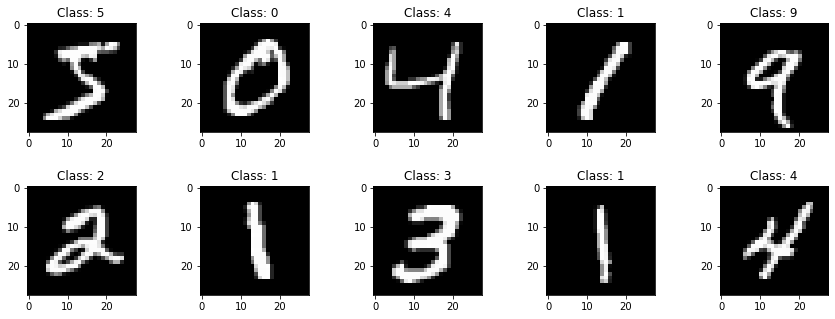

In [14]:
fig, axes = plt.subplots(nrows = 2, ncols = 5, figsize = (15, 5))
ax = axes.ravel()
for i in range(10):
  ax[i].imshow(x_train[i].reshape(28, 28), cmap ='gray')
  ax[i].title.set_text('Class: ' + str(y_train[i]))
plt.subplots_adjust(hspace=0.5)
plt.show()

To View Image in more Detail 

In [15]:
img = np.squeeze(x_train[7].reshape(28, 28))
img.shape

(28, 28)

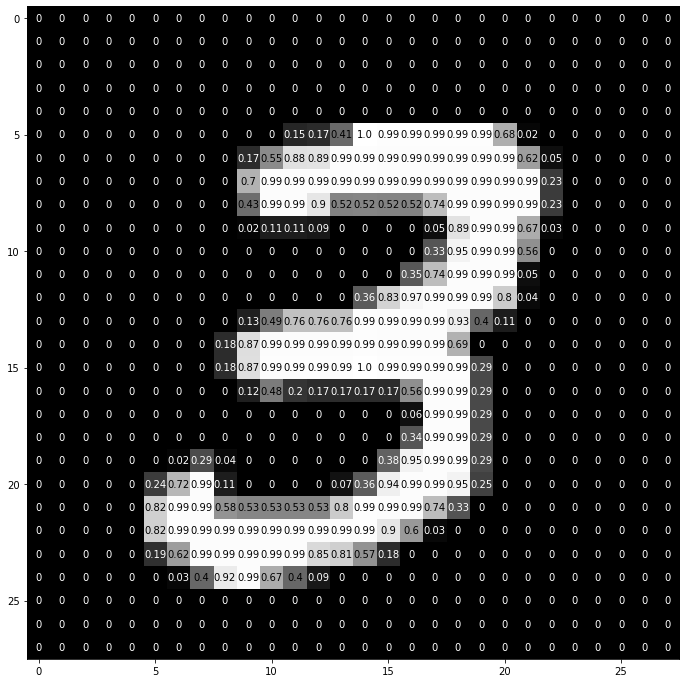

In [21]:
fig = plt.figure(figsize= (12, 12))
ax = fig.add_subplot(111)
ax.imshow(img, cmap = 'gray')
width, height = img.shape
thresh = img.max()/2.5

for x in range(width):
  for y in range(height):
    val = round(img[x][y], 2) if img[x][y] != 0 else 0
    ax.annotate(str(val), xy = (y, x),
                horizontalalignment = 'center',
                verticalalignment = 'center',
                color = 'white' if img[x][y] < thresh else 'black')

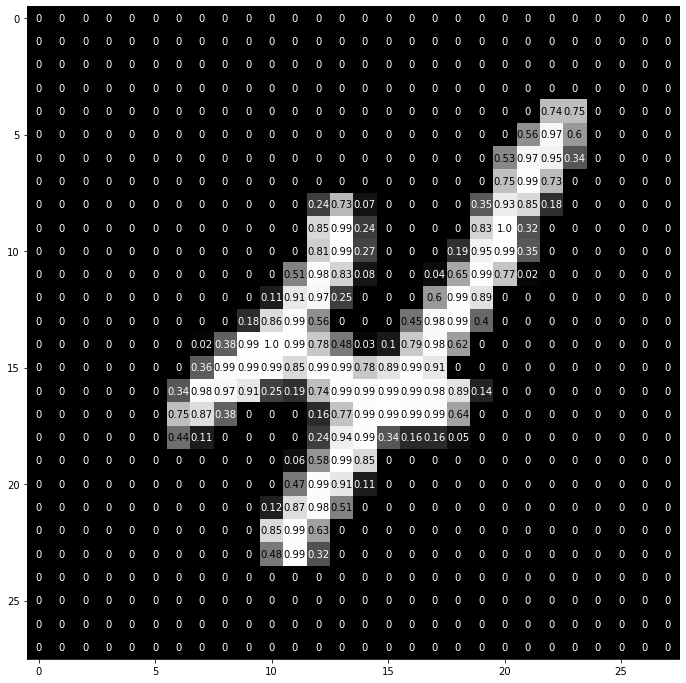

In [26]:
img = np.squeeze(x_train[9].reshape(28, 28))
fig = plt.figure(figsize= (12, 12))
ax = fig.add_subplot(111)
ax.imshow(img, cmap = 'gray')
width, height = img.shape
thresh = img.max()/2.5

for x in range(width):
  for y in range(height):
    val = round(img[x][y], 2) if img[x][y] != 0 else 0
    ax.annotate(str(val), xy = (y, x),
                horizontalalignment = 'center',
                verticalalignment = 'center',
                color = 'white' if img[x][y] < thresh else 'black')

In [31]:
model = Sequential()
model.add(Dense(400, activation = 'relu', input_dim =x_train.shape[1]))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(10, activation= 'softmax'))

model.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [32]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 400)               314000    
_________________________________________________________________
dense_17 (Dense)             (None, 256)               102656    
_________________________________________________________________
dense_18 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_19 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_20 (Dense)             (None, 10)                650       
Total params: 458,458
Trainable params: 458,458
Non-trainable params: 0
_________________________________________________________________


In [33]:
from keras.callbacks import EarlyStopping

In [36]:
## stating Early Stop
early_stop = EarlyStopping(monitor = 'val_loss', patience= 25, mode = 'min', verbose = 0)

In [39]:
## fitting the model
model.fit(x_train, y_train, validation_data=(x_test, y_test),epochs = 25, batch_size = 30, callbacks= [early_stop])

Epoch 1/25
2000/2000 [==============================] - 10s 5ms/step - loss: 0.0436 - accuracy: 0.9869 - val_loss: 0.0840 - val_accuracy: 0.9783
Epoch 2/25
2000/2000 [==============================] - 10s 5ms/step - loss: 0.0376 - accuracy: 0.9887 - val_loss: 0.0840 - val_accuracy: 0.9784
Epoch 3/25
2000/2000 [==============================] - 10s 5ms/step - loss: 0.0336 - accuracy: 0.9898 - val_loss: 0.0986 - val_accuracy: 0.9751
Epoch 4/25
2000/2000 [==============================] - 10s 5ms/step - loss: 0.0278 - accuracy: 0.9923 - val_loss: 0.0892 - val_accuracy: 0.9795
Epoch 5/25
2000/2000 [==============================] - 10s 5ms/step - loss: 0.0255 - accuracy: 0.9925 - val_loss: 0.0769 - val_accuracy: 0.9811
Epoch 6/25
2000/2000 [==============================] - 10s 5ms/step - loss: 0.0231 - accuracy: 0.9927 - val_loss: 0.0834 - val_accuracy: 0.9795
Epoch 7/25
2000/2000 [==============================] - 10s 5ms/step - loss: 0.0209 - accuracy: 0.9938 - val_loss: 0.1010 - val_ac

In [40]:
loss = model.history.history

In [41]:
loss_df = pd.DataFrame(loss)

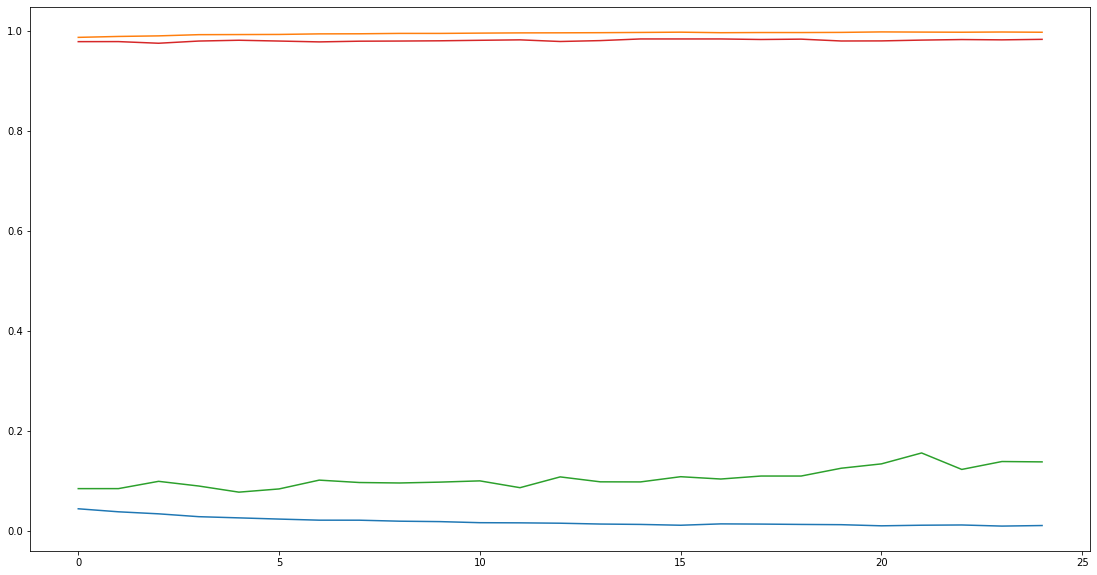

In [44]:
plt.figure(figsize=(19, 10))
plt.plot(loss_df)
plt.show()

using the model to predict classes

In [47]:
pred = model.predict_classes(x_test)

In [51]:
f1 = f1_score(y_test, pred, average = 'micro')
acc = accuracy_score(y_test, pred)
err = 1- acc

stat = pd.DataFrame({'Test_Accuracy': round(acc*100, 3),
                     'F1 score': round(f1 * 100, 3),
                     'Total_Loss': round(err*100, 3)}, index = [0])

stat.head()

,Test_Accuracy,F1 score,Total_Loss
0,98.29,98.29,1.71


In [52]:
sample_one = np.expand_dims(x_test[999], axis = 0)
sample_one = sample_one.reshape(1, 784)
model.predict_classes(sample_one)

array([9])

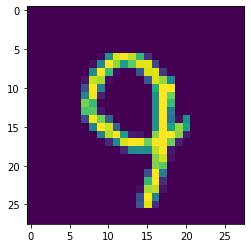

In [53]:
plt.imshow(x_test[999].reshape(28, 28))